In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pingouin as pg
from lets_plot import *


LetsPlot.setup_html(no_js=True)


# Set the plot style for prettier charts:
plt.style.use(

    "https://raw.githubusercontent.com/aeturrell/core_python/main/plot_style.txt"
)

In [2]:
# Create a dictionary with the data in
data = {
    "Copenhagen": [14.1, 14.1, 13.7, 12.9, 12.3, 11.7, 10.8, 10.6, 9.8, 5.3],
    "Dniprop": [11.0, 12.6, 12.1, 11.2, 11.3, 10.5, 9.5, 10.3, 9.0, 8.7],
    "Minsk": [12.8, 12.3, 12.6, 12.3, 11.8, 9.9, 9.9, 8.4, 8.3, 6.9],
}


df = pd.DataFrame.from_dict(data)
df.head()

,Copenhagen,Dniprop,Minsk
0,14.1,11.0,12.8
1,14.1,12.6,12.3
2,13.7,12.1,12.6
3,12.9,11.2,12.3
4,12.3,11.3,11.8


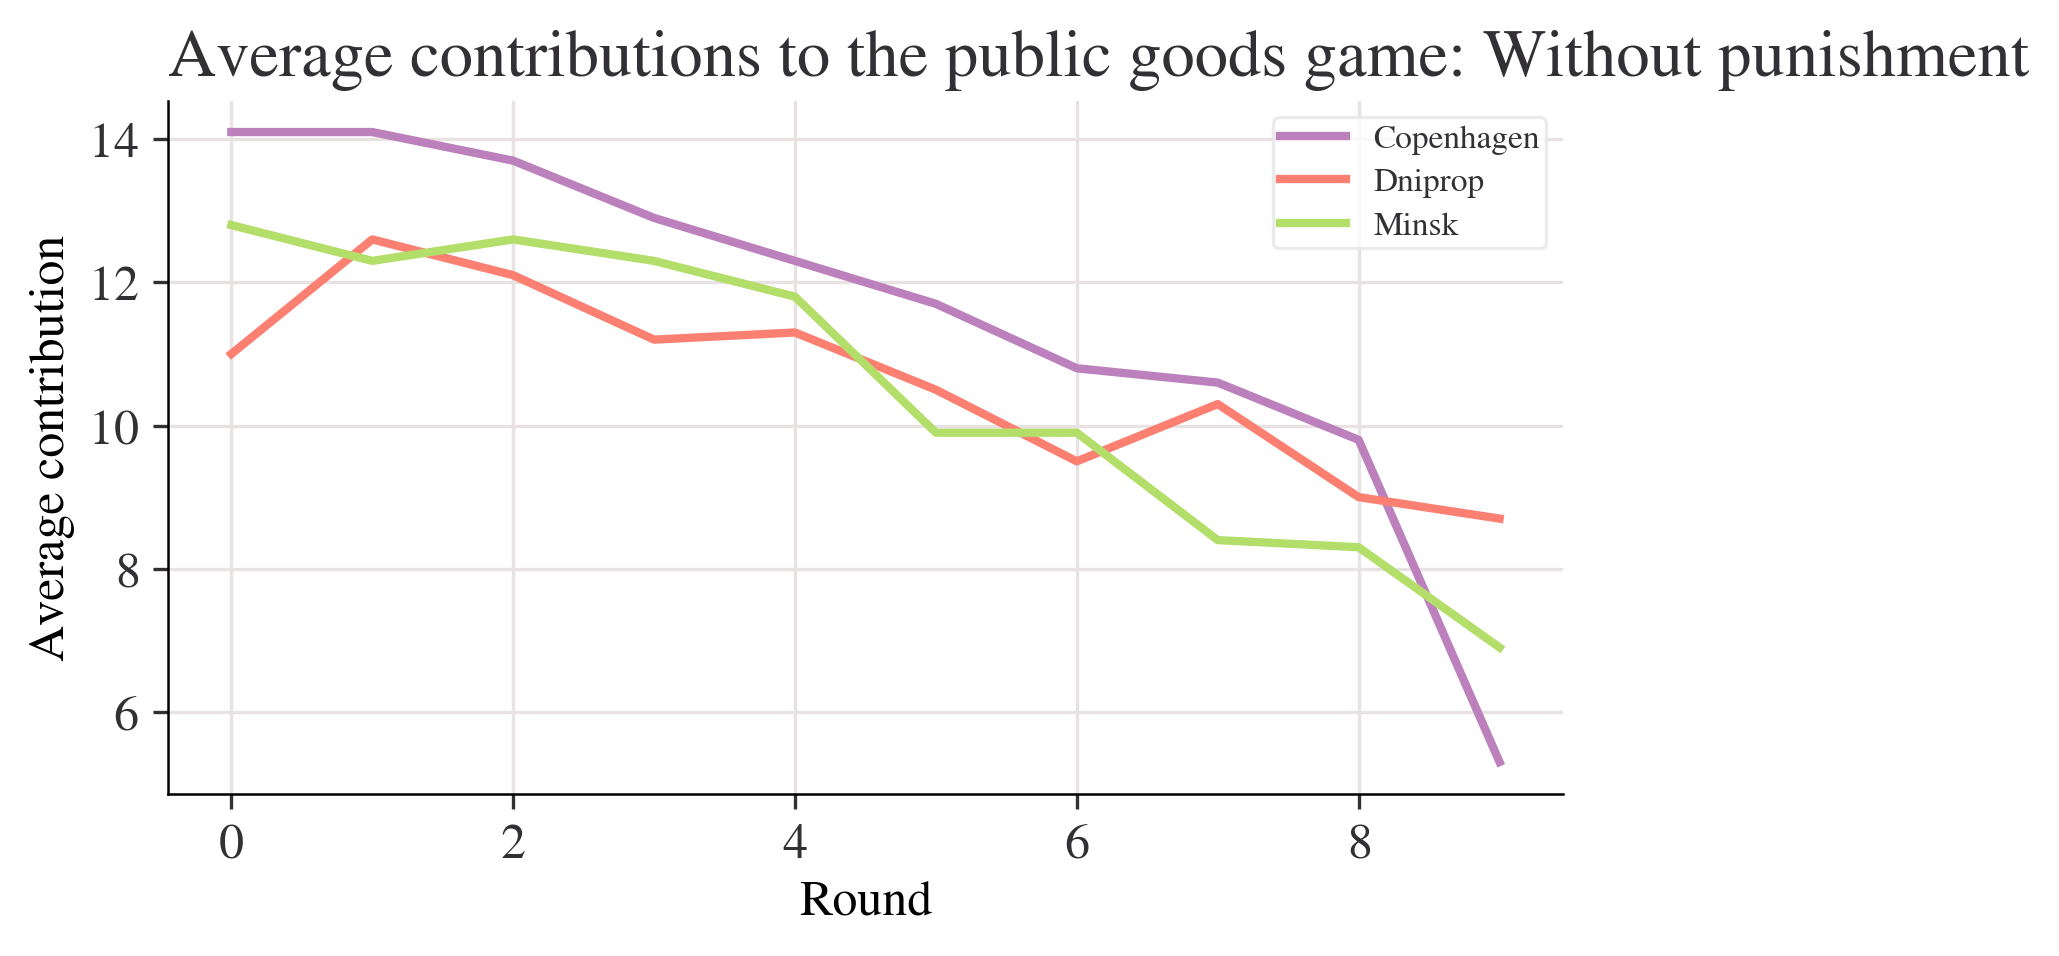

In [3]:
# Plot the data
fig, ax = plt.subplots()
df.plot(ax=ax)
ax.set_title("Average contributions to the public goods game: Without punishment")
ax.set_ylabel("Average contribution")
ax.set_xlabel("Round");

In [13]:
data_np = pd.read_excel(
    "data/doing-economics-datafile-working-in-excel-project-2.xlsx",
    usecols="A:Q",
    header=1,
    index_col="Period",
)
data_n = data_np.iloc[:10, :].copy()
data_p = data_np.iloc[14:24, :].copy()

C:\Users\15928\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [14]:
test_data = {
    "City A": [14.1, 14.1, 13.7],
    "City B": [11.0, 12.6, 12.1],
}


# Original dataframe
test_df = pd.DataFrame.from_dict(test_data)
# A copy of the dataframe
test_copy = test_df.copy()
# A pointer to the dataframe
test_pointer = test_df


test_pointer.iloc[1, 1] = 99

In [15]:
print("test_df=")
print(f"{test_df}\n")
print("test_copy=")
print(f"{test_copy}\n")

test_df=
   City A  City B
0    14.1    11.0
1    14.1    99.0
2    13.7    12.1

test_copy=
   City A  City B
0    14.1    11.0
1    14.1    12.6
2    13.7    12.1



In [18]:
data_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Copenhagen       10 non-null     object
 1   Dnipropetrovs’k  10 non-null     object
 2   Minsk            10 non-null     object
 3   St. Gallen       10 non-null     object
 4   Muscat           10 non-null     object
 5   Samara           10 non-null     object
 6   Zurich           10 non-null     object
 7   Boston           10 non-null     object
 8   Bonn             10 non-null     object
 9   Chengdu          10 non-null     object
 10  Seoul            10 non-null     object
 11  Riyadh           10 non-null     object
 12  Nottingham       10 non-null     object
 13  Athens           10 non-null     object
 14  Istanbul         10 non-null     object
 15  Melbourne        10 non-null     object
dtypes: object(16)
memory usage: 1.3+ KB


In [20]:
data_n = data_n.astype("double")
data_p = data_p.astype("double")

In [21]:
mean_n_c = data_n.mean(axis=1)
mean_p_c = data_p.agg(np.mean, axis=1)

C:\Users\15928\AppData\Local\Temp\ipykernel_7720\3801786469.py:2: FutureWarning: The provided callable <function mean at 0x0000022206BC32E0> is currently using DataFrame.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_p_c = data_p.agg(np.mean, axis=1)


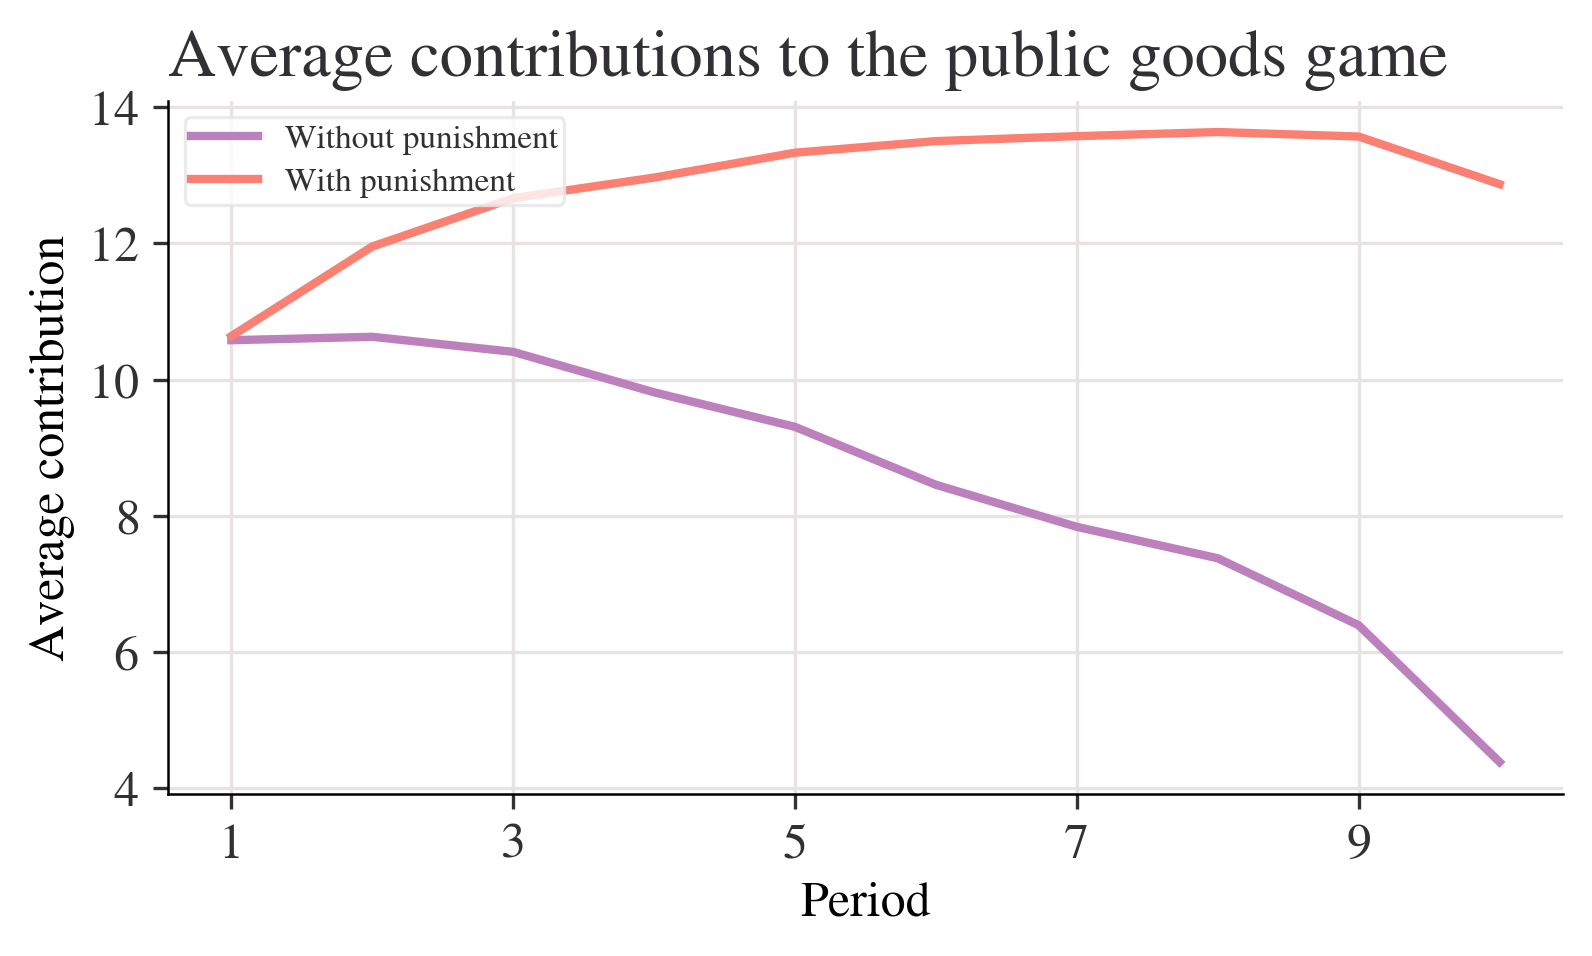

In [22]:
fig, ax = plt.subplots()
mean_n_c.plot(ax=ax, label="Without punishment")
mean_p_c.plot(ax=ax, label="With punishment")
ax.set_title("Average contributions to the public goods game")
ax.set_ylabel("Average contribution")
ax.legend();

Question: Describe any differences and similarities you see in the average contribution over time between the two experiments 
Answer: From the chart, we can see that the trend of the purple line is significantly decreasing at each time period. However, the orange line is slowly rising. They start at the same point. But their situation is different.

In [24]:
partial_names_list = ["F. Kennedy", "Lennon", "Maynard Keynes", "Wayne"]
["John " + name for name in partial_names_list]

['John F. Kennedy', 'John Lennon', 'John Maynard Keynes', 'John Wayne']

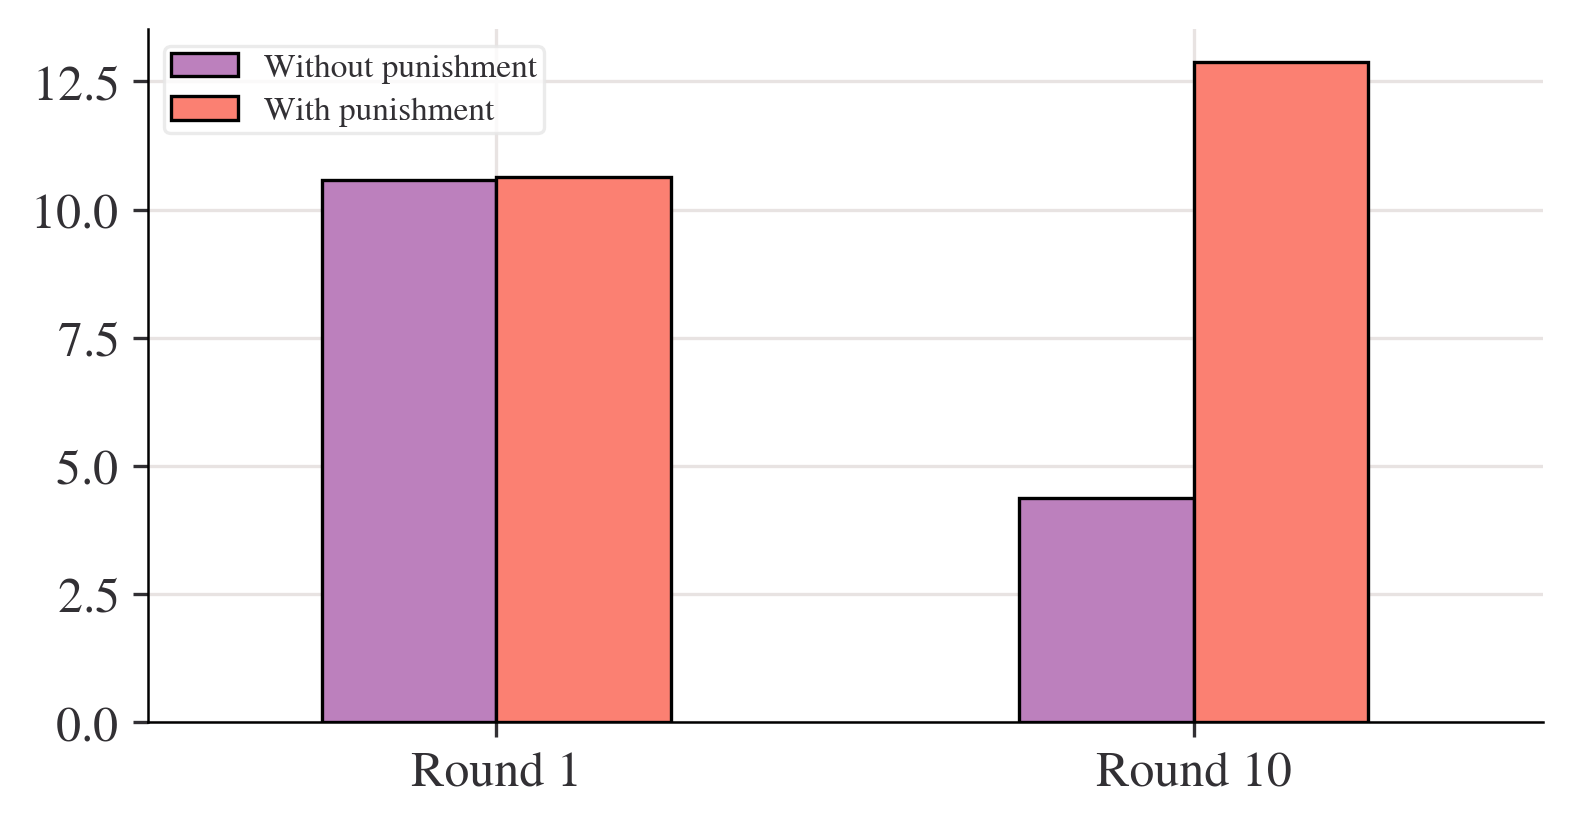

In [25]:
# Create new dataframe with bars in
compare_grps = pd.DataFrame(
    [mean_n_c.loc[[1, 10]], mean_p_c.loc[[1, 10]]],
    index=["Without punishment", "With punishment"],
)
# Rename columns to have 'round' in them
compare_grps.columns = ["Round " + str(i) for i in compare_grps.columns]
# Swap the column and index variables around with the transpose function, ready for plotting (.T is transpose)
compare_grps = compare_grps.T
# Make a bar chart
compare_grps.plot.bar(rot=0);

question:explain whether this means that the two sets of data are the same. answer:No,although the mean contribution for both experiments was 10.6 in Period 1,but in round 10 is totally different.The data from experiment with punishment is much higher than that from experiment without punishment.

In [26]:
n_c = data_n.agg(["std", "var", "mean"], 1)
n_c

,std,var,mean
Period,,,
1,2.020724,4.083325,10.578313
2,2.238129,5.009220,10.628398
3,2.329569,5.426891,10.407079
4,2.068213,4.277504,9.813033
5,2.108329,4.445049,9.305433
6,2.240881,5.021549,8.454844
7,2.136614,4.565117,7.837568
8,2.349442,5.519880,7.376388
9,2.413845,5.826645,6.392985


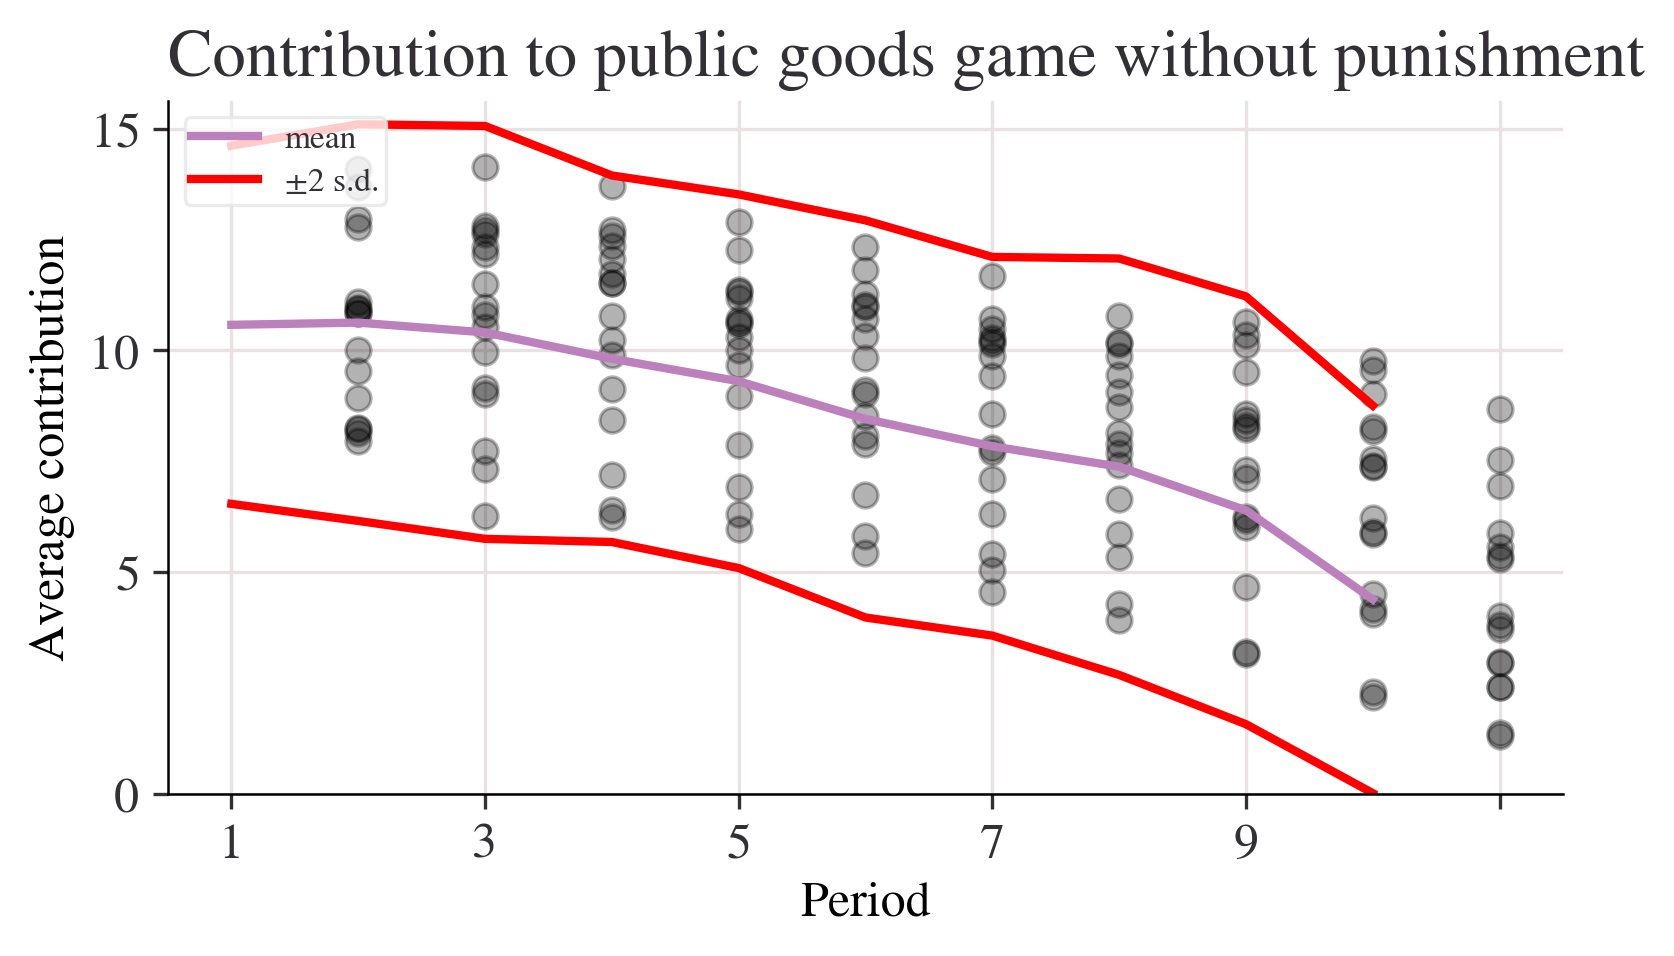

In [28]:
fig, ax = plt.subplots()
n_c["mean"].plot(ax=ax, label="mean")
# mean + 2 standard deviations
(n_c["mean"] + 2 * n_c["std"]).plot(ax=ax, ylim=(0, None), color="red", label="±2 s.d.")
# mean - 2 standard deviations
(n_c["mean"] - 2 * n_c["std"]).plot(ax=ax, ylim=(0, None), color="red", label="")
for i in range(len(data_n.columns)):
    ax.scatter(x=data_n.index, y=data_n.iloc[:, i], color="k", alpha=0.3)
ax.legend()
ax.set_ylabel("Average contribution")
ax.set_title("Contribution to public goods game without punishment")
plt.show()

In [30]:
data_p.apply(lambda x: x.max() - x.min(), axis=1)

Period
1     10.199675
2     12.185065
3     12.689935
4     12.625000
5     12.140375
6     12.827541
7     13.098931
8     13.482621
9     13.496754
10    11.307360
dtype: float64

In [31]:
# A lambda function accepting three inputs, a, b, and c, and calculating the sum of the squares
test_function = lambda a, b, c: a**2 + b**2 + c**2


# Now we apply the function by handing over (in parenthesis) the following inputs: a=3, b=4 and c=5
test_function(3, 4, 5)

50

In [36]:
range_function = lambda x: x.max() - x.min()
range_p = data_p.apply(range_function, axis=1)
range_n = data_n.apply(range_function, axis=1)

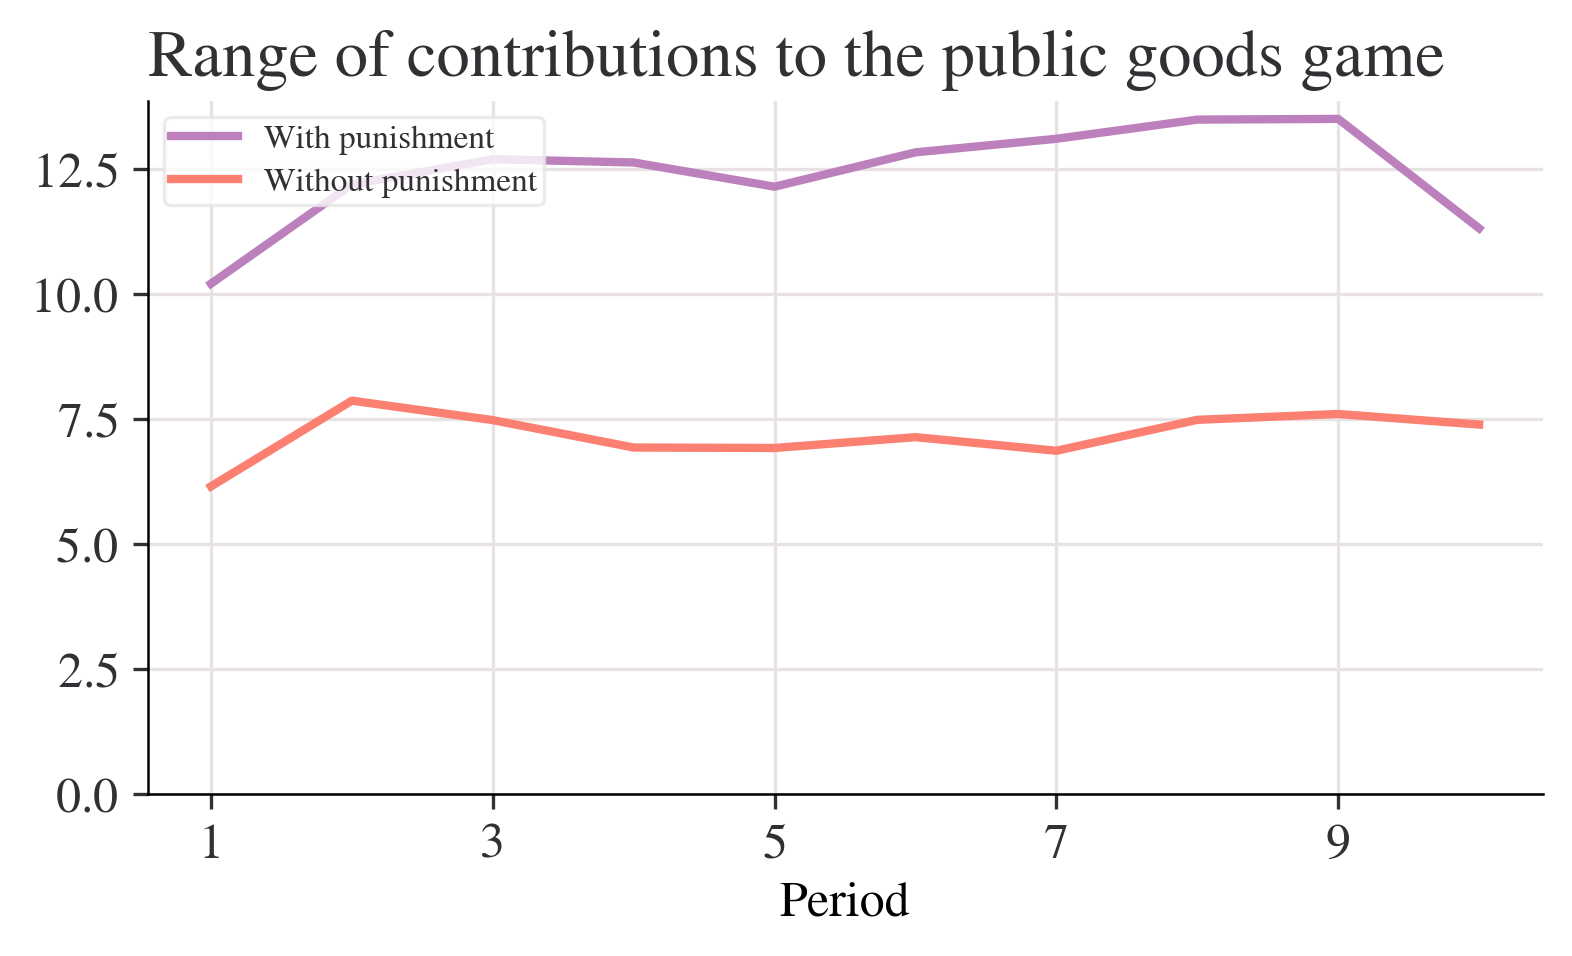

In [37]:
fig, ax = plt.subplots()
range_p.plot(ax=ax, label="With punishment")
range_n.plot(ax=ax, label="Without punishment")
ax.set_ylim(0, None)
ax.legend()
ax.set_title("Range of contributions to the public goods game")
plt.show()

In [38]:
funcs_to_apply = [range_function, "max", "min", "std", "mean"]
summ_p = data_p.apply(funcs_to_apply, axis=1).rename(columns={"<lambda>": "range"})
summ_n = data_n.apply(funcs_to_apply, axis=1).rename(columns={"<lambda>": "range"})

In [39]:
summ_n.loc[[1, 10], :].round(2)

,range,max,min,std,mean
Period,,,,,
1,6.14,14.10,7.96,2.02,10.58
10,7.38,8.68,1.30,2.19,4.38


question:Comment on any similarities and differences in the distributions, both across time and across experiments 
answer:
similarities:the statistics vary in different periods and different experiments 
differences:in experiment with punishment,the data is always going up,data from petiod 10 is always higher than that in period 1 but in experiment without punishment,the data from petiod 10 is not always higher than that in period 1

In [40]:
summ_p.loc[[1, 10], :].round(2)

,range,max,min,std,mean
Period,,,,,
1,10.20,16.02,5.82,3.21,10.64
10,11.31,17.51,6.20,3.90,12.87


In [41]:
pg.ttest(x=data_n.iloc[0, :], y=data_p.iloc[0, :])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.063782,30,two-sided,0.949567,"[-2.0, 1.87]",0.02255,0.337,0.050437


In [42]:
pg.ttest(x=data_n.iloc[0, :], y=data_p.iloc[0, :], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.149959,15,two-sided,0.882795,"[-0.92, 0.8]",0.02255,0.258,0.05082


question:What does this p-value tell us about the difference in means in Period 1? answer:This result of the previous one delivers a p-value of 0.9496. This means it is very likely that the assumption that there are no differences in the populations is likely to be true.In the latter one,The p-value becomes smaller as we can attribute more of the differences to the ‘with punishment’ treatment, but the p-value is still very large (0.882795), so we still conclude that the differences in Period 1 are likely to be due to chance.